El objetivo de nuestro proyecto es clasificar la canción en uno de los 5 intervalos de popularidad

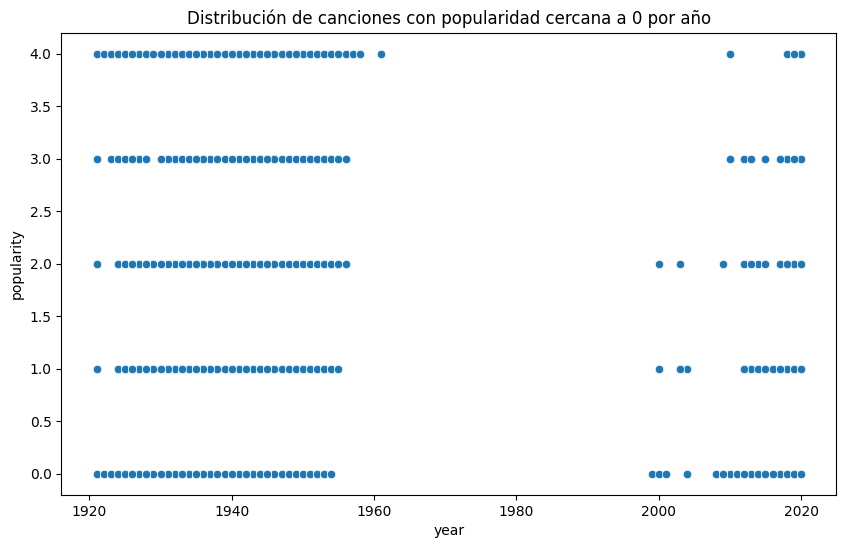

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('archive/data.csv')

# Mostramos la distribución de canciones con popularidad cercana a 0 por año
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['popularity'] < 5], x='year', y='popularity')
plt.title("Distribución de canciones con popularidad cercana a 0 por año")
plt.show()

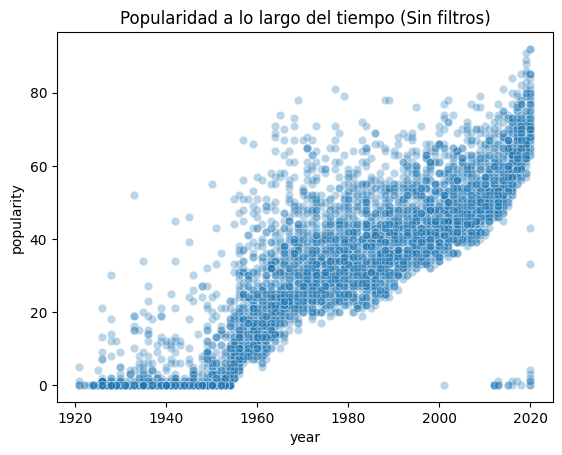

In [18]:
# Gráfico de TODOS los datos (una muestra aleatoria para no saturar)
sns.scatterplot(data=df.sample(5000), x='year', y='popularity', alpha=0.3)
plt.title("Popularidad a lo largo del tiempo (Sin filtros)")
plt.show()

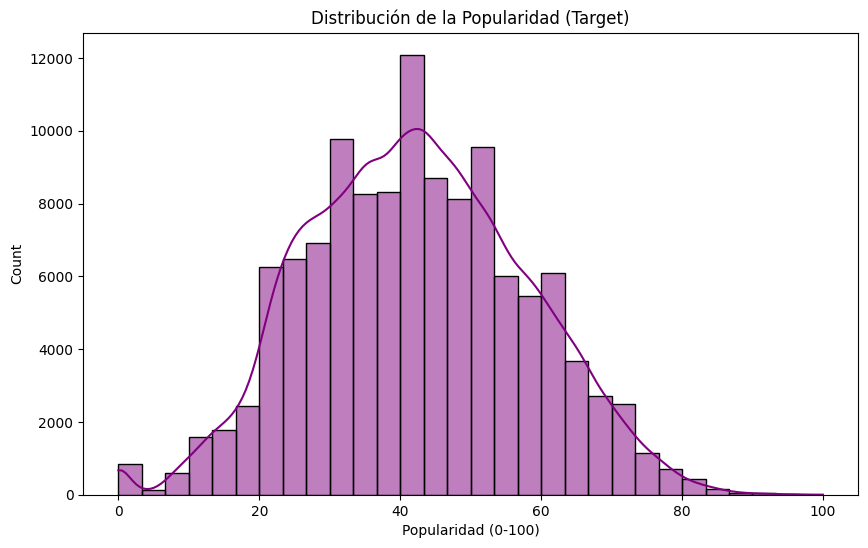

count    120750.000000
mean         42.169201
std          15.516553
min           0.000000
25%          31.000000
50%          42.000000
75%          53.000000
max         100.000000
Name: popularity, dtype: float64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_final['popularity'], kde=True, bins=30, color='purple')
plt.title('Distribución de la Popularidad (Target)')
plt.xlabel('Popularidad (0-100)')
plt.show()

# Estadísticos básicos
print(df_final['popularity'].describe())

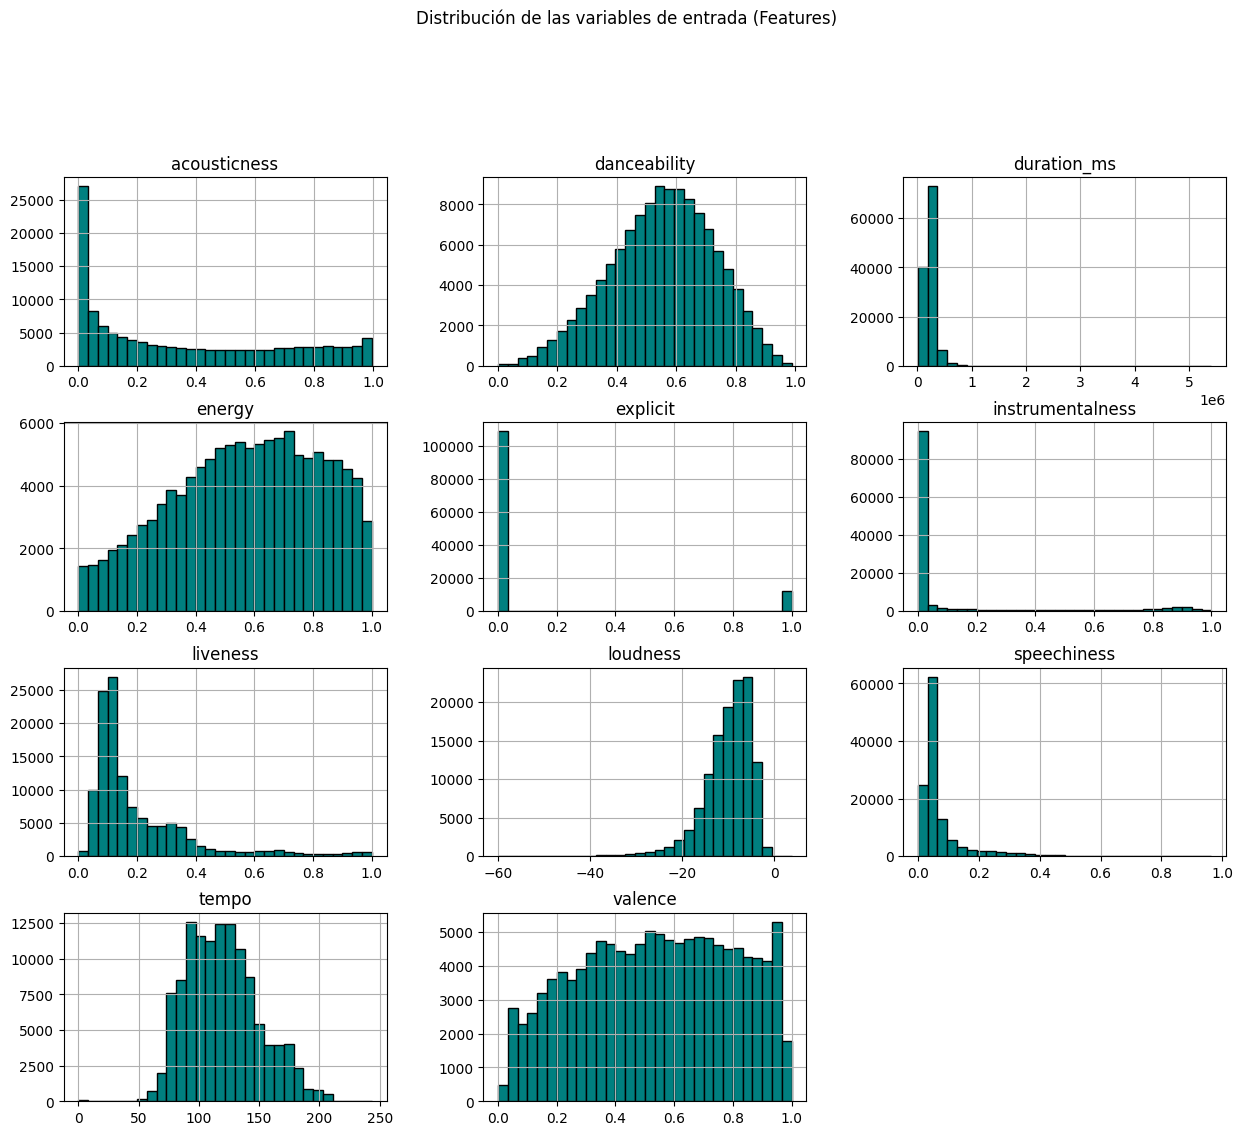

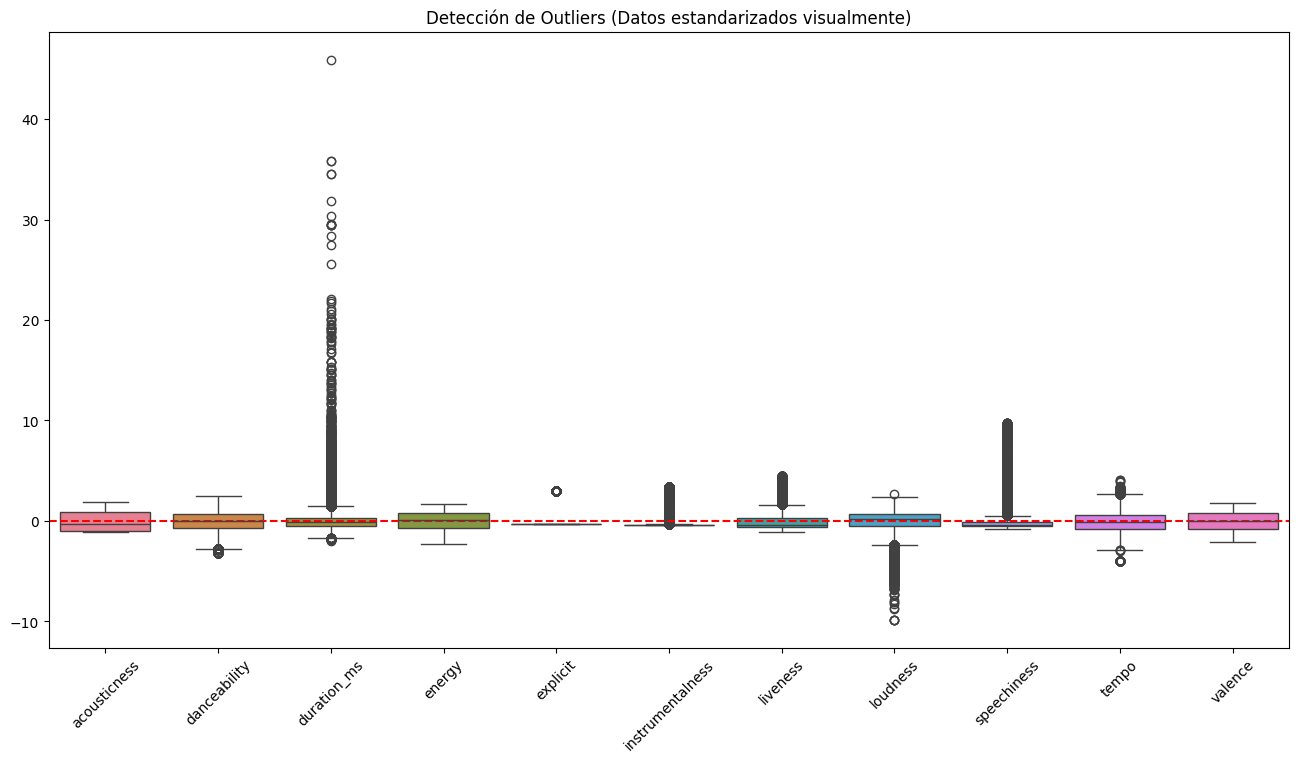

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos las columnas numéricas que usaremos para predecir
# Quitamos 'popularity' (es la Y) y 'year' (ya sabemos que está bien)
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
            'explicit', 'instrumentalness', 'liveness', 'loudness',
            'speechiness', 'tempo', 'valence']

# 1. HISTOGRAMAS (¿Cómo se distribuyen los datos?)
df_final[features].hist(figsize=(15, 12), bins=30, color='teal', edgecolor='black')
plt.suptitle('Distribución de las variables de entrada (Features)', y=1.02)
plt.show()

# 2. BOXPLOTS (Para ver Outliers y Escalas)
plt.figure(figsize=(16, 8))
# Usamos escala logarítmica para duration_ms porque es GIGANTE comparado con el resto
# O mejor: Estandarizamos visualmente solo para el gráfico para poder compararlas
df_norm_visual = (df_final[features] - df_final[features].mean()) / df_final[features].std()

sns.boxplot(data=df_norm_visual)
plt.xticks(rotation=45)
plt.title('Detección de Outliers (Datos estandarizados visualmente)')
plt.axhline(y=0, color='r', linestyle='--') # Línea de la media
plt.show()